In [1]:
from erddapy import ERDDAP


e = ERDDAP(server='https://data.ioos.us/gliders/erddap')

In [2]:
min_lat, max_lat = 20, 30
min_lon, max_lon = -82, -97
        
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': min_lon,
    'max_lon': max_lon,
    'min_lat': min_lat,
    'max_lat': max_lat,
    'min_time': '2018-01-10T00:00:00Z',
    'max_time': '2018-07-13T00:00:00Z',
    'cdm_data_type': 'trajectoryprofile'
}

In [3]:
import pandas as pd


search_url = e.get_search_url(response='csv', **kw)

search = pd.read_csv(search_url)
gliders = search['Dataset ID'].values
print('Found {} Glider Datasets:\n{}'.format(len(gliders), '\n'.join(gliders)))

Found 4 Glider Datasets:
allgcoos_dmacGliders
allrutgersGliders
Reveille-20180627T1500
Sverdrup-20180509T1742


In [5]:
server = 'https://data.ioos.us/gliders/erddap'

dataset_id = 'Sverdrup-20180509T1742'

variables = [
 'depth',
 'latitude',
 'longitude',
 'salinity',
 'temperature',
 'time',
]

In [6]:
from erddapy import ERDDAP


e = ERDDAP(
    server=server,
    protocol='tabledap',
)

e.dataset_id = dataset_id
e.variables = variables
        
print(
    e.get_download_url(
        response='mat',
    )
)

https://data.ioos.us/gliders/erddap/tabledap/Sverdrup-20180509T1742.mat?depth,latitude,longitude,salinity,temperature,time


In [7]:
df = e.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)
).dropna()

df.head()

,depth,latitude,longitude,salinity,temperature
time,,,,,
2018-05-09 17:42:20,8.483534,27.866188,-93.587218,35.827316,25.1057
2018-05-09 17:42:20,9.943779,27.866188,-93.587218,35.845436,25.0770
2018-05-09 17:42:20,11.374212,27.866188,-93.587218,35.847050,25.0591
2018-05-09 17:42:20,12.745035,27.866188,-93.587218,35.850310,25.0548
2018-05-09 17:42:20,13.688713,27.866188,-93.587218,35.855020,25.0467


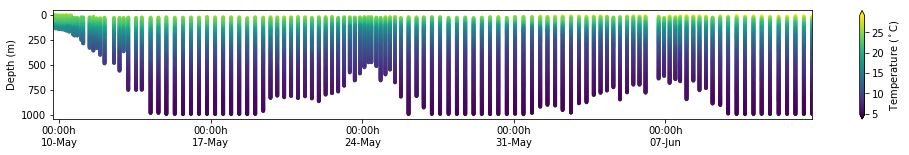

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'],
                marker='o', edgecolor='none')

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

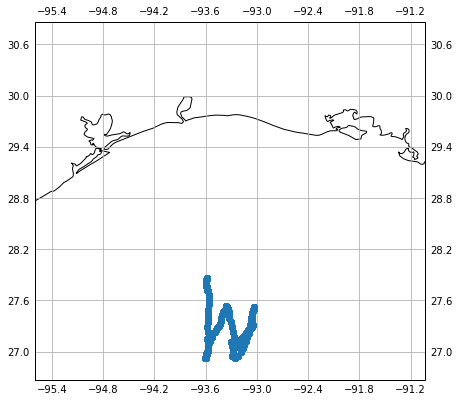

In [10]:
import cartopy.crs as ccrs

fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(7, 7)
)
ax.plot(df['longitude'], df['latitude'], 'o')
ax.gridlines(draw_labels=True)
ax.coastlines('10m')
ax.set_extent([df['longitude'].min()-2, df['longitude'].max()+2,
               df['latitude'].min()-0.25, df['latitude'].max()+3]);